In [29]:
import math
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime

In [30]:
df = pd.read_csv("complete.csv", infer_datetime_format=True, usecols= range(11))
df.head()
#df.drop(df.columns[[11]], axis = 1, inplace = True)

C:\Users\UAL-Laptop\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20             1/2 hour   
4                900           15 minutes   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005    29.38421   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008        53.2   
3  My older brother and twin sister were leaving ...   1/17/2004  28.9783333   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004  21.4180556   

    longitude  
0  -97.941111  
1  -98.581082  
2   -2.916667  
3  -96.645833  
4 -157.803611

In [31]:
type(df.datetime.loc[0])

str

In [32]:
df.datetime.loc[166]

'38636'

In [33]:
bad_rows = []
for i, dt in enumerate(df.datetime):
    dtl = dt.split()
    if len(dtl) != 2:
        bad_rows.append(i)
df2 = df.drop(bad_rows)
df2.head()

datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20             1/2 hour   
4                900           15 minutes   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005    29.38421   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008        53.2   
3  My older brother and twin sister were leaving ...   1/17/2004  28.9783333   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004  21.4180556   

    longitude  
0  -97.941111  
1  -98.581082  
2   -2.916667  
3  -96.645833  
4 -157.803611

In [34]:
df2.tail()

datetime            city state country    shape  \
88870  9/9/2013 22:00            napa    ca      us    other   
88871  9/9/2013 22:20          vienna    va      us   circle   
88872  9/9/2013 23:00          edmond    ok      us    cigar   
88873  9/9/2013 23:00           starr    sc      us  diamond   
88874  9/9/2013 23:30  ft. lauderdale    fl      us     oval   

      duration (seconds) duration (hours/min)  \
88870             1200.0                 hour   
88871                5.0            5 seconds   
88872             1020.0           17 minutes   
88873                0.0             2 nights   
88874                0.0       still occuring   

                                                comments date posted  \
88870                                       Napa UFO&#44   9/30/2013   
88871  Saw a five gold lit cicular craft moving fastl...   9/30/2013   
88872  2 witnesses 2  miles apart&#44 Red &amp; White...   9/30/2013   
88873  On September ninth my wife and i noticed stran...   9/30/2013   
88874  Hovering object lit with red and white lights&...   9/30/2013   

         latitude   longitude  
88870  38.2972222 -122.284444  
88871  38.9011111  -77.265556  
88872  35.6527778  -97.477778  
88873  34.3769444  -82.695833  
88874  26.1219444  -80.143611

In [35]:
df2.index = range(len(df2))

In [36]:
df2.datetime.loc[166]

'10/10/2006 1:00'

In [37]:
dts = []
for i, dt in enumerate(df2.datetime):
    dtl = dt.split()
    if len(dtl) == 2:
        dtl = dtl[0].split("/")
    else:
        print(i,dt)
    if len(dtl) == 3:
        dts.append(datetime(int(dtl[2]), int(dtl[0]), int(dtl[1])))
len(dts), len(df2)

(87613, 87613)

In [38]:
df2.head()

datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20             1/2 hour   
4                900           15 minutes   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005    29.38421   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008        53.2   
3  My older brother and twin sister were leaving ...   1/17/2004  28.9783333   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004  21.4180556   

    longitude  
0  -97.941111  
1  -98.581082  
2   -2.916667  
3  -96.645833  
4 -157.803611

In [39]:
df2.insert(len(df2.columns), "dts", dts)
df2.head()

datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20             1/2 hour   
4                900           15 minutes   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005    29.38421   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008        53.2   
3  My older brother and twin sister were leaving ...   1/17/2004  28.9783333   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004  21.4180556   

    longitude        dts  
0  -97.941111 1949-10-10  
1  -98.581082 1949-10-10  
2   -2.916667 1955-10-10  
3  -96.645833 1956-10-10  
4 -157.803611 1960-10-10

In [40]:
df2.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude', 'dts'],
      dtype='object')

In [41]:
df2.dts.loc[0]

Timestamp('1949-10-10 00:00:00')

In [50]:
plt.rcParams['axes.facecolor'] = 'black'
df.loc[: ,'latitude'].replace({0.0: np.nan}, inplace=True)
latitude = df.latitude
latitude.head()

0    29.883056
1    29.384210
2    53.200000
3    28.978333
4    21.418056
Name: latitude, dtype: float64

In [51]:
type(df.latitude.loc[0])

numpy.float64

In [52]:
for i, val in enumerate(latitude):
    if type(val) is str:
        val = float(val)
        latitude[i] = val

In [53]:
latitude.head()

0    29.883056
1    29.384210
2    53.200000
3    28.978333
4    21.418056
Name: latitude, dtype: float64

([<matplotlib.axis.XTick at 0x26e8766ebe0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

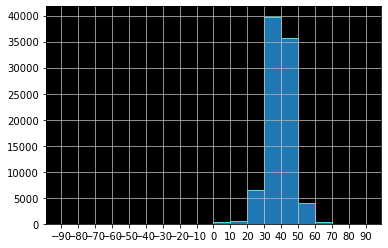

In [74]:
bins = range(-90, 100, 10)
plt.hist(latitude, bins = bins, edgecolor = "turquoise")
plt.grid(True)
plt.xticks(ticks = bins)